PolyData (0x136bf51e0)
  N Cells:    842
  N Points:   842
  N Strips:   0
  X Bounds:   -4.993e-01, 4.993e-01
  Y Bounds:   -4.965e-01, 4.965e-01
  Z Bounds:   -5.000e-01, 5.000e-01
  N Arrays:   0



/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


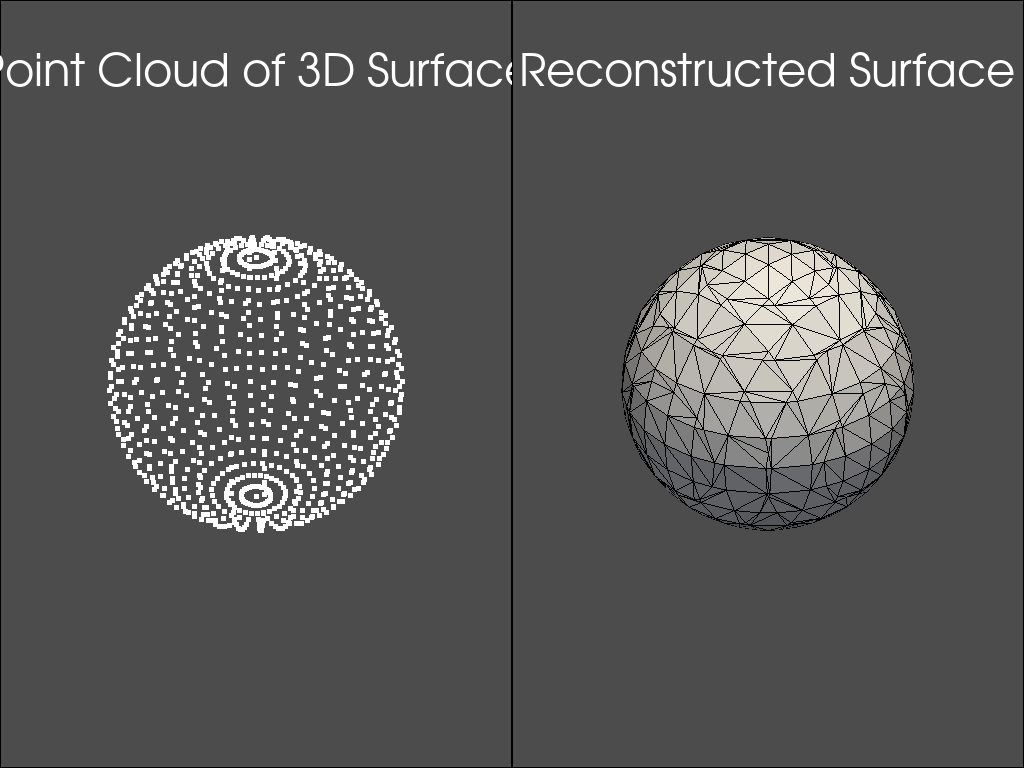

In [154]:
import pyvista as pv
import pygame
points = pv.wrap(pv.Sphere().points)
surf = points.reconstruct_surface()
print(points)
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(points)
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()


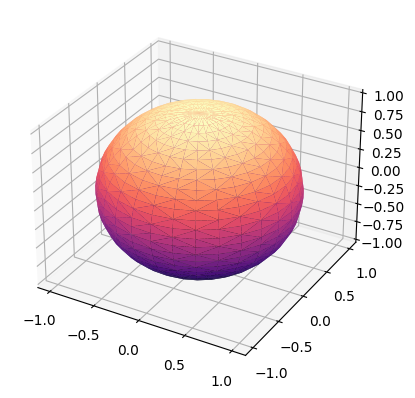

In [155]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def triangulateSphere(ax, k=30, cmap=cm.magma):
  
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    # plot the sphere
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices, cmap=cmap
    )
    
triangulateSphere(ax)
plt.show()

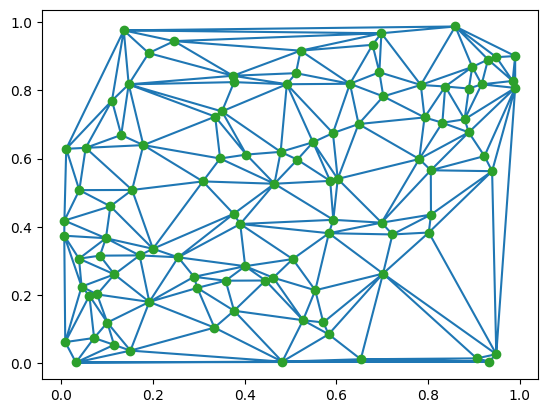

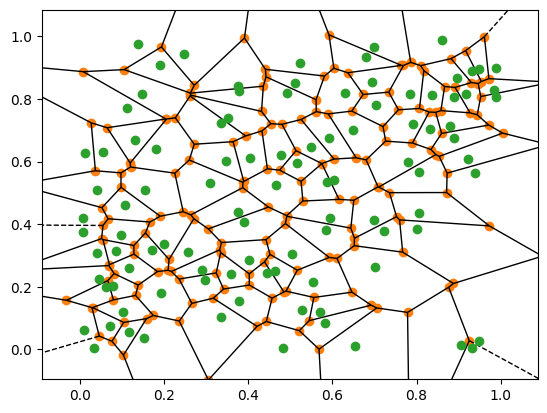

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, Delaunay, voronoi_plot_2d

# Generate a set of random points
points = np.random.rand(100, 2)

# Construct the Delaunay triangulation
tri = Delaunay(points)

# Plot the Delaunay triangulation
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# Construct the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


In [159]:
def delaunay(points):
    # Add a super-triangle that contains all points
    xmin, ymin = np.min(points, axis=0)
    xmax, ymax = np.max(points, axis=0)
    dx = xmax - xmin
    dy = ymax - ymin
    dmax = max(dx, dy)
    xmid = xmin + dx * 0.5
    ymid = ymin + dy * 0.5
    points = np.vstack([points, [xmid-dmax, ymid-dmax], [xmid, ymid+dmax], [xmid+dmax, ymid-dmax]])
    n = len(points)
    
    # Create an empty list of triangles and a list of edges
    triangles = [[n-3, n-2, n-1]]
    edges = set()
    
    # Helper function to find the circumcenter of a triangle
    def circumcenter(tri):
        x1, y1 = points[tri[0]]
        x2, y2 = points[tri[1]]
        x3, y3 = points[tri[2]]
        d = 2 * (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
        ux = ((x1**2 + y1**2) * (y2-y3) + (x2**2 + y2**2) * (y3-y1) + (x3**2 + y3**2) * (y1-y2)) / d
        uy = ((x1**2 + y1**2) * (x3-x2) + (x2**2 + y2**2) * (x1-x3) + (x3**2 + y3**2) * (x2-x1)) / d
        r = np.sqrt((x1-ux)**2 + (y1-uy)**2)
        return [ux, uy, r]
    
    # Loop over each point and find the containing triangle
    for i in range(n-3):
        p = points[i]
        edge_candidates = set()
        for tri in triangles:
            if np.all(np.isclose(circumcenter(tri)[:2], p, atol=1e-2)):
                # The point is on the circumcircle, remove the triangle and add its edges
                for j in range(3):
    
                    k = (j + 1) % 3
                    edge = tuple(sorted([tri[j], tri[k]]))
                    
                    if edge in edges:
                        edges.remove(edge)
                    else:
                        edge_candidates.add(edge)
                triangles.remove(tri)
        
        # Add new triangles using the edge candidates
        for edge in edge_candidates:
            triangles.append([edge[0], edge[1], i])
            edges.add(edge)
    
    # Remove any triangles that include the super-triangle vertices
    bad_triangles = set()
    for tri in triangles:
        if tri[0] >= n-3 or tri[1] >= n-3 or tri[2] >= n-3:
            bad_triangles.add(tuple(sorted(tri)))
    triangles = [tri for tri in triangles if tuple(sorted(tri)) not in bad_triangles]
    
    # Remove the super-triangle vertices
    points = points[:n-3]
    
    return points, triangles







(array([[0.00520006, 0.44261593],
       [0.98279907, 0.66130774],
       [0.8322762 , 0.31302566],
       [0.68686949, 0.0304669 ],
       [0.21285919, 0.32640661],
       [0.23330907, 0.02862549],
       [0.69494619, 0.81209169],
       [0.97289871, 0.65820273],
       [0.3521405 , 0.50505862],
       [0.26934217, 0.40224366],
       [0.94891302, 0.24472622],
       [0.35742355, 0.94987701],
       [0.22315443, 0.50476752],
       [0.62397775, 0.20208059],
       [0.53973685, 0.77946175],
       [0.38160212, 0.69409885],
       [0.11183264, 0.89691304],
       [0.09079079, 0.80534389],
       [0.51501736, 0.52670266],
       [0.96878206, 0.27061395],
       [0.5036656 , 0.57569448],
       [0.75648447, 0.3445844 ],
       [0.48769638, 0.68341529],
       [0.70020273, 0.09430981],
       [0.1428724 , 0.0407059 ],
       [0.67191334, 0.02507352],
       [0.73497988, 0.4058818 ],
       [0.77223699, 0.75594072],
       [0.04086212, 0.07916135],
       [0.99943613, 0.06391077]]), [])


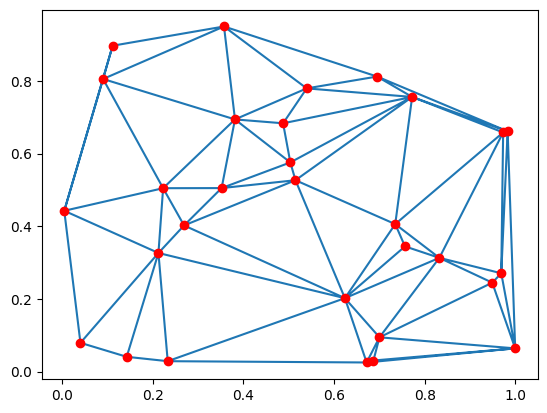

In [160]:
points = np.random.rand(30, 2)

# Construct the Delaunay triangulation
tri = delaunay(points)
print(tri)
x, y = np.split(tri[0],[-1],axis=1)

x = x.reshape(1,-1).tolist()
y = y.reshape(1,-1).tolist()

# Plot the Delaunay triangulation
plt.triplot(points[:,0], points[:,1])
plt.scatter(x,y,color='r')
#plt.plot(points[:,0], points[:,1], 'o')
plt.show()


